In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
from sqlalchemy import column


df=pd.read_csv('DATA/Frozen_Dessert_Production.csv',parse_dates=True,index_col='DATE')

In [122]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [123]:
df.columns=['Sales']

In [124]:
df

,Sales
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


<AxesSubplot:xlabel='DATE'>

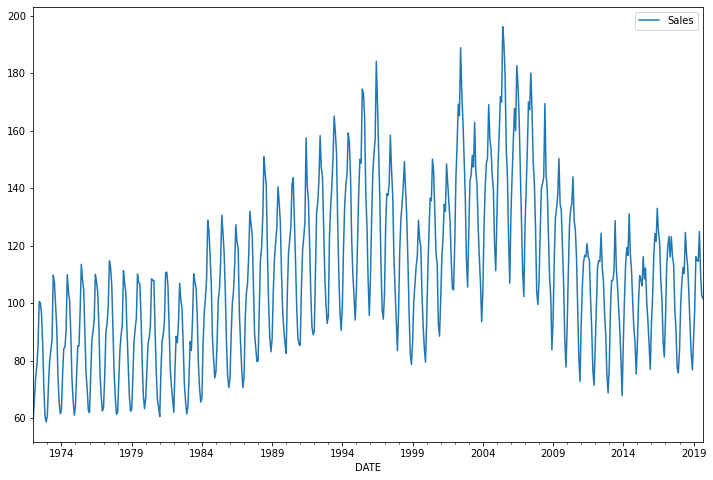

In [125]:
df.plot(figsize=(12,8))

I will take 2 years for test set so 24 months (24 rows)

In [126]:
len(df)

573

In [127]:
test_index=len(df) - 18

In [128]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler=MinMaxScaler()

In [131]:
scaler.fit(train)

MinMaxScaler()

In [132]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [133]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [134]:
length = 12

In [135]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [136]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [138]:
n_features=1

In [139]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [140]:
from tensorflow.keras.callbacks import EarlyStopping

In [141]:
early_stop= EarlyStopping(monitor='val_loss',patience=5)

In [142]:
model.fit_generator(generator, epochs=30,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/30


C:\Users\ZAIDI Mohamed Arysse\AppData\Local\Temp\ipykernel_22944\436504075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=30,validation_data=validation_generator,callbacks=[early_stop])


543/543 [==============================] - 6s 7ms/step - loss: 0.0211 - val_loss: 0.0066
Epoch 2/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0077 - val_loss: 0.0143
Epoch 3/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0059 - val_loss: 0.0020
Epoch 4/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 5/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 6/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 7/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0039 - val_loss: 0.0056
Epoch 8/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 9/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 10/30
543/543 [==============================] - 3s 6ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 11/3

In [143]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

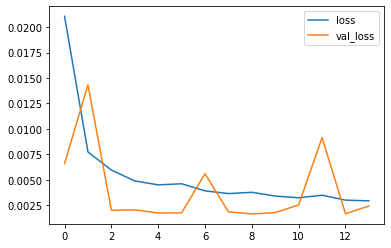

In [144]:
losses.plot()

to forecast we will work with 3 epochs

In [145]:
first_eval_batch = scaled_train[-length:]

In [146]:
first_eval_batch

array([[0.4695409 ],
       [0.41743926],
       [0.46851409],
       [0.41889656],
       [0.39641011],
       [0.28544533],
       [0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169]])

In [147]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [148]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 215ms/step


array([[0.41239652]], dtype=float32)

In [149]:
scaled_test[0]

array([0.39102302])

In [150]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 23ms/step


In [151]:
test_predictions

[array([0.41239652], dtype=float32),
 array([0.44490296], dtype=float32),
 array([0.4587968], dtype=float32),
 array([0.44966298], dtype=float32),
 array([0.4139582], dtype=float32),
 array([0.34983742], dtype=float32),
 array([0.27302188], dtype=float32),
 array([0.20504849], dtype=float32),
 array([0.19314209], dtype=float32),
 array([0.24317831], dtype=float32),
 array([0.30902636], dtype=float32),
 array([0.36726302], dtype=float32),
 array([0.41430527], dtype=float32),
 array([0.44597033], dtype=float32),
 array([0.46135083], dtype=float32),
 array([0.45852593], dtype=float32),
 array([0.4343593], dtype=float32),
 array([0.3859957], dtype=float32)]

In [152]:
true_predictions=scaler.inverse_transform(test_predictions)

In [153]:
test['predictions']=true_predictions

C:\Users\ZAIDI Mohamed Arysse\AppData\Local\Temp\ipykernel_22944\2081619921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


In [154]:
test

,Sales,predictions
DATE,,
2018-04-01,112.4309,115.370054
2018-05-01,110.3544,119.840141
2018-06-01,124.5841,121.750737
2018-07-01,117.2215,120.494711
2018-08-01,112.6779,115.584805
2018-09-01,103.3118,106.767308
2018-10-01,92.1321,96.204103
2018-11-01,82.4347,86.856817
2018-12-01,76.7608,85.219522


<AxesSubplot:xlabel='DATE'>

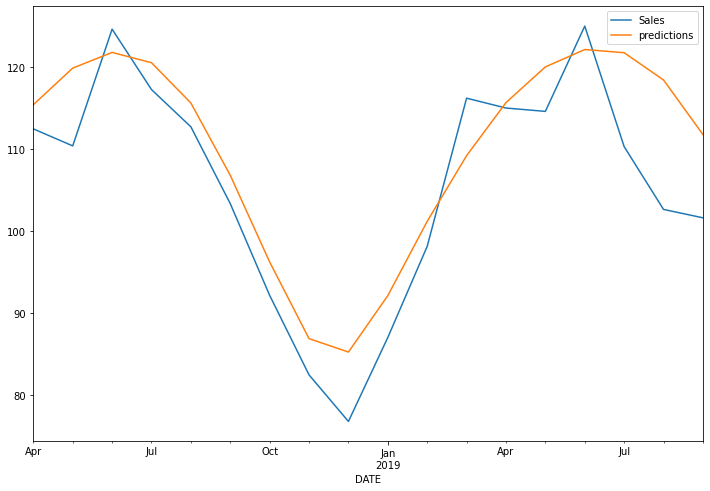

In [155]:
test.plot(figsize=(12,8))

In [156]:
scaled_full_data = scaler.fit_transform(df)

In [157]:
length=24

In [158]:
generator = TimeseriesGenerator (scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [159]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [169]:
model.fit_generator(generator, epochs=12)

Epoch 1/12
  4/549 [..............................] - ETA: 9s - loss: 0.0030 

C:\Users\ZAIDI Mohamed Arysse\AppData\Local\Temp\ipykernel_22944\3704273981.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=12)


549/549 [==============================] - 6s 11ms/step - loss: 0.0038
Epoch 2/12
549/549 [==============================] - 6s 11ms/step - loss: 0.0035
Epoch 3/12
549/549 [==============================] - 6s 10ms/step - loss: 0.0034
Epoch 4/12
549/549 [==============================] - 5s 10ms/step - loss: 0.0036
Epoch 5/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0033
Epoch 6/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0032
Epoch 7/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0033
Epoch 8/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0027
Epoch 9/12
549/549 [==============================] - 5s 8ms/step - loss: 0.0028
Epoch 10/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0026
Epoch 11/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0027
Epoch 12/12
549/549 [==============================] - 5s 9ms/step - loss: 0.0025


In [170]:
periods = 24

In [171]:
forecast=[]

first_eval_batch=scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 42ms/step


In [172]:
forecast

[array([0.24832648], dtype=float32),
 array([0.22674805], dtype=float32),
 array([0.2549039], dtype=float32),
 array([0.32359618], dtype=float32),
 array([0.37860778], dtype=float32),
 array([0.41752845], dtype=float32),
 array([0.4515524], dtype=float32),
 array([0.4808947], dtype=float32),
 array([0.4898844], dtype=float32),
 array([0.4465757], dtype=float32),
 array([0.39112315], dtype=float32),
 array([0.3414901], dtype=float32),
 array([0.3070541], dtype=float32),
 array([0.31589133], dtype=float32),
 array([0.37574586], dtype=float32),
 array([0.4326048], dtype=float32),
 array([0.47582057], dtype=float32),
 array([0.51529336], dtype=float32),
 array([0.5462643], dtype=float32),
 array([0.56795514], dtype=float32),
 array([0.5501479], dtype=float32),
 array([0.5020863], dtype=float32),
 array([0.45557374], dtype=float32),
 array([0.42816058], dtype=float32)]

In [173]:
forecast=scaler.inverse_transform(forecast)

In [174]:
forecast_index=pd.date_range(start='2019-10-01',periods=periods,freq='MS')

In [175]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index)

In [176]:
forecast_df

,0
2019-10-01,92.808143
2019-11-01,89.840809
2019-12-01,93.712631
2020-01-01,103.158773
2020-02-01,110.723632
2020-03-01,116.075766
2020-04-01,120.754530
2020-05-01,124.789508
2020-06-01,126.025715
2020-07-01,120.070166


(564.0, 620.0)

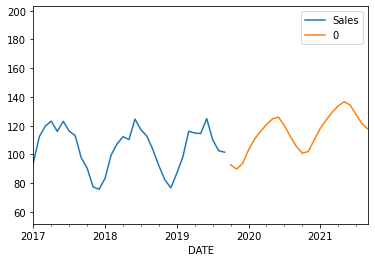

In [177]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2017-01-01','2021-09-01')